In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from scipy.interpolate import interp1d
from sklearn.preprocessing import normalize

In [ ]:
df = pd.read_csv("Physical_Activity_Monitoring_unlabeled.csv")
df.drop(columns=['timestamp', 'subject_id', 'handTemperature', "chestTemperature", "ankleTemperature"], inplace=True)
df.interpolate(method='linear', axis=0, limit=None,  inplace=True)
df.fillna

<bound method NDFrame.fillna of         handAcc16_1  handAcc16_2  handAcc16_3  handAcc6_1  handAcc6_2  \
0          0.902847     7.458720     6.032490    1.006100     7.44575   
1         -4.069330     3.761680     8.279720   -5.972500     3.22273   
2         -2.007540    -9.601800     0.773674   -1.803500    -9.58937   
3        -13.262200     5.854430     0.899334  -13.611500     5.91511   
4         -0.013940     8.665400     4.398210    0.144153     8.56816   
...             ...          ...          ...         ...         ...   
534596    -9.084250     4.701220     2.890170   -9.689610     6.78077   
534597    -7.725900     3.511265     2.548905   -8.026035     4.55563   
534598    -6.367550     2.321310     2.207640   -6.362460     2.33049   
534599     5.461940    10.436400    -9.073300    8.348860     5.76518   
534600    -9.225910     2.006060     2.627730   -9.076460     1.97274   

        handAcc6_3  handGyro1  handGyro2  handGyro3  handMagne1  ...  \
0         6.303650  -0.021952   0.004114  -0.000752    -9.99538  ...   
1         6.908970   0.116054  -0.375968  -0.012890    40.45580  ...   
2         1.073680   0.020131   0.042189  -0.011507     7.26741  ...   
3         0.840377   1.715630  -0.050492  -1.829000    46.48220  ...   
4         4.822200  -0.006938  -0.007383  -0.032679     3.97764  ...   
...            ...        ...        ...        ...         ...  ...   
534596    3.975430  -0.157406   0.774189   4.369120    20.63540  ...   
534597    3.291520   0.024472   0.207387   3.166230    27.22420  ...   
534598    2.607610   0.206349  -0.359415   1.963340    33.81300  ...   
534599   -6.143210   3.543910   2.757300   0.087904    38.75990  ...   
534600    2.837680  -0.001754  -0.017191   0.002167    36.63300  ...   

        ankleGyro1  ankleGyro2  ankleGyro3  ankleMagne1  ankleMagne2  \
0         0.043954   -0.025606    0.030239    -14.54470      27.3336   
1        -0.319186   -0.670163    1.786200    -32.82570     -15.7719   
2         0.065654   -0.009741   -0.006579    -18.81710      16.3089   
3         2.970010   -0.163470   -3.495570    -26.74180      34.3566   
4         0.013953   -0.028172   -0.003737    -17.77980      -3.9981   
...            ...         ...         ...          ...          ...   
534596   -0.693049    0.424520   -0.856836    -25.00990     -23.5557   
534597    1.619630   -1.767710   -3.050980    -35.70240      31.8018   
534598   -0.741392   -0.034144   -0.402013    -49.69220      20.6039   
534599   -3.427920    0.352062   -5.577750    -34.15510     -11.0786   
534600    0.018631   -0.016041    0.005842     -1.01141     -16.4092   

        ankleMagne3  ankleOrientation1  ankleOrientation2  ankleOrientation3  \
0         -5.766200           0.206416           0.348212           0.763201   
1         -1.313950           0.578332          -0.566734           0.405888   
2         25.292800           0.139776           0.676586           0.393796   
3         21.327400           0.416303           0.783387           0.306464   
4         10.995000           0.171133          -0.748343           0.252988   
...             ...                ...                ...                ...   
534596    23.615300           0.318171          -0.701921           0.555778   
534597    16.421800           0.435887           0.660643           0.371665   
534598    -0.917908           0.561652           0.297957           0.756767   
534599    39.737500           0.062163          -0.798705          -0.056668   
534600    15.181500           0.324008          -0.710975           0.227375   

        ankleOrientation4  
0               -0.503652  
1               -0.423791  
2                0.606316  
3                0.345075  
4               -0.588807  
...                   ...  
534596          -0.311745  
534597           0.485200  
534598           0.151899  
534599          -0.595815  
534600          -0.581235  

[534601 rows x 48 columns]>

In [ ]:
df.isna().sum()

,0
handAcc16_1,0
handAcc16_2,0
handAcc16_3,0
handAcc6_1,0
handAcc6_2,0
handAcc6_3,0
handGyro1,0
handGyro2,0
handGyro3,0
handMagne1,0


In [ ]:
df.fillna(0, inplace=True)
df.mode()#

,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,handMagne1,...,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4
0,4.92929,-0.255085,8.27411,6.52404,4.59747,8.68119,-0.030563,0.011026,-0.014448,-40.0069,...,0.011593,-0.026906,-1.868460,-12.5625,8.67268,37.7974,1.0,0.0,0.0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,-0.002530,NaN,NaN,NaN,...,0.015773,-0.015110,-0.011462,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.017915,-0.010295,-0.007496,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.007741,-0.002663,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.000185,0.001230,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.001841,0.011576,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.012142,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.012253,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.012299,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.013208,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.drop(columns=["handOrientation1", "handOrientation2" , "handOrientation3", "handOrientation4", "chestOrientation1", "chestOrientation2" , "chestOrientation3", "chestOrientation4", "ankleOrientation1", "ankleOrientation2" , "ankleOrientation3", "ankleOrientation4" ], inplace=True)

In [ ]:
df.isna().sum()

,0
handAcc16_1,0
handAcc16_2,0
handAcc16_3,0
handAcc6_1,0
handAcc6_2,0
handAcc6_3,0
handGyro1,0
handGyro2,0
handGyro3,0
handMagne1,0


In [ ]:
df.std().round(2)

,0
handAcc16_1,7.05
handAcc16_2,7.21
handAcc16_3,3.82
handAcc6_1,7.06
handAcc6_2,6.85
handAcc6_3,3.82
handGyro1,1.16
handGyro2,0.93
handGyro3,1.61
handMagne1,23.90


In [ ]:
std_values = df.std()
df = df.drop(columns=std_values[std_values < 1e-3].index)

In [ ]:
sensor_columns = {
    'hand': ['handAcc16', 'handAcc6', 'handGyro', 'handMag'],
    'chest': ['chestAcc16', 'chestAcc6', 'chestGyro', 'chestMag'],
    'ankle': ['ankleAcc16', 'ankleAcc6', 'ankleGyro', 'ankleMag']
}

# 2. Находим все компоненты x,y,z для каждого датчика
xyz_components = []
for sensor in sensor_columns:
    for metric in sensor_columns[sensor]:
        # Ищем столбцы, содержащие название метрики
        cols = [col for col in df.columns if metric in col]
        if len(cols) == 3:
            xyz_components.extend(cols)

            df[f'{sensor}_{metric}_mag'] = np.sqrt(
                df[cols[0]]**2 + df[cols[1]]**2 + df[cols[2]]**2
            )
df.drop(columns=xyz_components, inplace=True)

In [ ]:
cols_to_drop = [col for col in ["hand_acc_6_mag", "chest_acc_6_mag", "ankle_acc_6_mag"]
               if col in df.columns]
if cols_to_drop:
    df.drop(columns=cols_to_drop, inplace=True)
    print(f"Удалены столбцы: {cols_to_drop}")
else:
    print("Удаляемые столбцы не найдены")

print("Проверка пропущенных значений после удаления столбцов:")
missing_values = df.isna().sum()

# Фильтруем и выводим только столбцы с пропусками
missing_values = missing_values[missing_values > 0]
if len(missing_values) > 0:
    print("\nСтолбцы с пропущенными значениями:")
    print(missing_values)
else:
    print("\nПропущенных значений нет")

Удаляемые столбцы не найдены
Проверка пропущенных значений после удаления столбцов:

Пропущенных значений нет


In [ ]:
features = df.drop(columns=['timestamp', 'subject_id'], errors='ignore')
features.fillna(features.mean(), inplace=True)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(features)

In [ ]:
normalize(df, norm='l2')#

array([[1.34529957e-01, 1.36934836e-01, 3.12008727e-04, ...,
        1.37101590e-01, 8.26251017e-04, 4.39737770e-01],
       [1.20635525e-01, 1.17262792e-01, 4.76680796e-03, ...,
        9.90757976e-02, 2.34209183e-02, 4.41245758e-01],
       [1.68528893e-01, 1.68126396e-01, 8.24522309e-04, ...,
        1.68338471e-01, 1.14234671e-03, 6.07901555e-01],
       ...,
       [6.73332339e-02, 6.85831821e-02, 1.89550935e-02, ...,
        9.02082649e-02, 7.97331542e-03, 5.08234573e-01],
       [1.36543376e-01, 1.08922021e-01, 4.12429631e-02, ...,
        3.03746087e-01, 6.02091830e-02, 4.91833161e-01],
       [1.64523946e-01, 1.63043801e-01, 2.92371005e-04, ...,
        1.66358131e-01, 4.24214934e-04, 3.75667818e-01]])

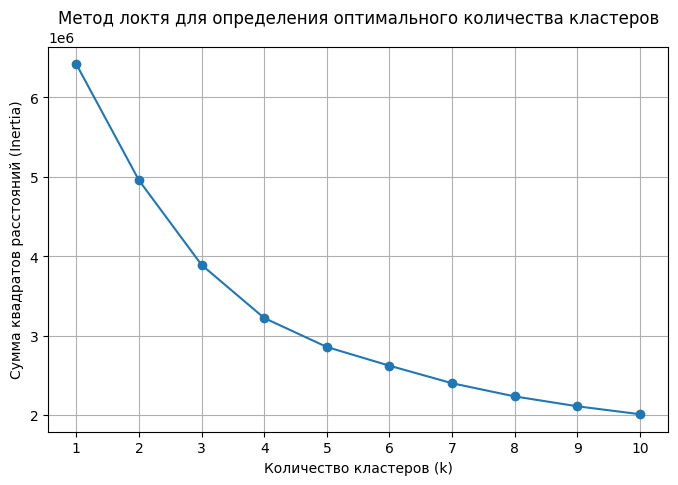

In [ ]:
inertias = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_range, inertias, marker='o')
plt.title("Метод локтя для определения оптимального количества кластеров")
plt.xlabel("Количество кластеров (k)")
plt.ylabel("Сумма квадратов расстояний (Inertia)")
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [ ]:
normalize(df, norm='l1')

array([[5.55204504e-02, 5.65129427e-02, 1.28765855e-04, ...,
        5.65817620e-02, 3.40993407e-04, 1.81479571e-01],
       [5.08970533e-02, 4.94740710e-02, 2.01115283e-03, ...,
        4.18008387e-02, 9.88146502e-03, 1.86164969e-01],
       [6.53077675e-02, 6.51517931e-02, 3.19516198e-04, ...,
        6.52339755e-02, 4.42678475e-04, 2.35572029e-01],
       ...,
       [3.14993327e-02, 3.20840742e-02, 8.86743090e-03, ...,
        4.22005597e-02, 3.73001713e-03, 2.37758518e-01],
       [4.91456144e-02, 3.92039497e-02, 1.48444459e-02, ...,
        1.09326344e-01, 2.16708959e-02, 1.77023914e-01],
       [6.46923288e-02, 6.41103221e-02, 1.14962968e-04, ...,
        6.54135472e-02, 1.66805214e-04, 1.47716041e-01]])

In [ ]:
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(data_scaled)

unique_labels = sorted(df['cluster'].unique())
mapping = {old: new+1 for new, old in enumerate(unique_labels)}
df['activityID'] = df['cluster'].map(mapping)

df['Index'] = range(len(df))

In [ ]:
submission_df = df[['Index', 'activityID']]
submission_df.to_csv("submission.csv", index=False)

In [ ]:
df['activityID'].unique()

array([1, 3, 6, 4, 5, 2])

In [ ]:
df['Index'] = range(len(df))
submission_df = df[['Index', 'activityID']]

In [ ]:
for index, row in submission_df.iterrows():
    if row['activityID'] == 1:
        submission_df.loc[index, 'activityID'] = 1
    if row['activityID'] == 3:
        submission_df.loc[index, 'activityID'] = 2
    if row['activityID'] == 6:
        submission_df.loc[index, 'activityID'] = 3
    if row['activityID'] == 4:
        submission_df.loc[index, 'activityID'] = 4
    if row['activityID'] == 5:
        submission_df.loc[index, 'activityID'] = 5
    if row['activityID'] == 2:
        submission_df.loc[index, 'activityID'] = 6

In [ ]:
submission_df

,Index,activityID
0,0,1
1,1,2
2,2,1
3,3,2
4,4,1
...,...,...
534596,534596,5
534597,534597,2
534598,534598,4
534599,534599,6


In [ ]:
submission_df['activityID'].unique()

array([1, 2, 3, 4, 5, 6])